# IBM Data Science Professional Certificate capstone project
This notebook contains work towards the Professional Certificate capstone project

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


# Segmenting and Clustering Neighborhoods in Toronto

## Import the necessary dependencies

In [3]:
from bs4 import BeautifulSoup
import requests

## Fetch the website with the information

In [4]:
# Define url
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [5]:
# Get text trhough a request
page = requests.get(url).text

In [6]:
# Create a BeautifulSoup object
soup = BeautifulSoup(page, "html.parser")

In [7]:
# Check whether we got the right page
print(soup.title)

<title>List of postal codes of Canada: M - Wikipedia</title>


## Extract useful information from the table rows

In [8]:
# Create an empty list which will be populated with postal code - borough - neighborhood triplets
contents = []

# Fetch only the table from the webpage
table = soup.find('table')

# Iterate over rows in the table and collect relevant information
for row in table.findAll('td'):
    # Create an empty dictionary per iteration
    dict1 = {}
    if row.span.text == 'Not assigned':
        pass
    # Populate dictionaries with data
    else:
        dict1['postal_code'] = row.p.text[:3]
        dict1['borough'] = (row.span.text).split('(')[0]
        dict1['neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
    # Append dictionary data (postal code - borough - neighborhood triplet) to the empty list
        contents.append(dict1)

## Create a dataframe

In [9]:
# Create a dataframe from the contents list
df_toronto = pd.DataFrame(contents)

In [10]:
# Visualize both ends of the dataframe
df_toronto.head()

,postal_code,borough,neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [11]:
df_toronto.tail()

,postal_code,borough,neighborhood
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
102,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [12]:
# Correct some borough names, then visualize again
df_toronto['borough'] = df_toronto['borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest',
                                                       'East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [13]:
df_toronto.head()

,postal_code,borough,neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [14]:
df_toronto.tail()

,postal_code,borough,neighborhood
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."
102,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [15]:
# Check whether any postal code entry appears more than once
false = []
true = []
for item in df_toronto['postal_code'].value_counts() > 1:
    if item == False:
        false.append(False)
    if item == True:
        true.append(True)
print('Repeated postal codes: ' + str(len(true)))
print('Unique postal codes: ' + str(len(false)))

Repeated postal codes: 0
Unique postal codes: 103


In [16]:
# Check whether any borough has no assigned neighborhoods
assigned = []
not_assigned = []
for item in df_toronto['neighborhood'].str.contains('Not assigned'):
    if item == False:
        assigned.append(False)
    if item == True:
        not_assigned.append(True)

print('boroughs with no assigned neighborhoods: ' + str(len(not_assigned)))
print('boroughs with assigned neighborhoods: ' + str(len(assigned)))

boroughs with no assigned neighborhoods: 0
boroughs with assigned neighborhoods: 103


In [17]:
df_toronto.shape

(103, 3)

## Add coordinates

Geocoder wasn't working well for me, so I downloaded the csv file with coordinates instead. The code block for fetching the coordinates through geocoder is shown below in any case.

In [18]:
# Import geocoder
#import geocoder 

# Initialize lists which will contain latitude and longitude data
#latlist = []
#longlist = []

# For loop to go over each postal code
#for postal_code in df_toronto['postal_code']:
    
    # Initialize a None variable to sustain while loop
    #lat_lng_coords = None
    
    # While loop until the coordinates are secured
    #while(lat_lng_coords is None):
        #g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        #lat_lng_coords = g.latlng
    
    # Split latitude and longitude intolatitudeividual variables
    #latitude = lat_lng_coords[0]
    #longitude = lat_lng_coords[1]
    
    # On each for loop iteration append latitude and longitude values to their respective lists
    #latlist.append(latitude)
    #longlist.append(longitude)
    
# Visualize the lists
#latlist
#longlist

# Append lists to dataframe as new columns
#df_toronto['latitude'] = latlist
#df_toronto ['longitude'] = longlist

# Visualize the updated dataframe
#df_toronto.head()

In [19]:
# Import dataframe with coordinates
df_coord = pd.read_csv('geospatial_coordinates.csv')

In [20]:
# Make columns consistent with previous dataframe
df_coord.columns = ['postal_code', 'latitude', 'longitude']

In [21]:
# Visualize
df_coord

,postal_code,latitude,longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [22]:
# Ensure that we have the same number of postal code entries as in our previous dataframe
df_coord.shape

(103, 3)

In [23]:
# Create a merged dataframe
df_toronto_coords = pd.merge(df_toronto, df_coord)

In [24]:
# Visualize the new dataframe
df_toronto_coords

,postal_code,borough,neighborhood,latitude,longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


## Neighborhood clustering

First, neighborhoods will be visualized using folium

In [25]:
# Get the coordinates of Toronto
from geopy.geocoders import Nominatim 
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent='toronto_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [1]:
# Get folium
import folium
toronto_map = folium.Map(location=[latitude,longitude], zoom_start=11)

# Markers
for lat, lng, label in zip(df_toronto_coords['latitude'], df_toronto_coords['longitude'], 
                           df_toronto_coords['neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng], radius=5, popup=label, color='blue',
                       fill=True, fill_color='#3186cc', fill_opacity=0.7,
                       parse_html=False).add_to(toronto_map)

NameError: name 'latitude' is not defined

In [27]:
# Display map
toronto_map

As someone who hasn't visited Toronto, it isn't immediately obvious to me how these neighborhoods should be clustered, so I'll let the K-means clustering algorithm decide for me.

First, let's get venues in the area. For each neighborhood, we'll fetch up to 100 venues in a 500 m

### Foursquare query and data treatment
My foursquare credentials were assigned to variables, and then used to fetch data. I commented them out afterwards for privacy reasons.

In [28]:
# Variables for Foursquare query. Personal credentials were commented out after running the cell
import requests
client_id = 'redacted'
client_secret = 'redacted'
access_token = 'redacted'
version = '20180605'
limit = 100
radius = 500

In [29]:
# Split the neighborhood data into lists to use in a for loop
names = df_toronto_coords['neighborhood']
latitudes = df_toronto_coords['latitude']
longitudes = df_toronto_coords['longitude']

In [30]:
# Function that loops over each neighborhood, sends a foursquare request, and gets venues
def getnearbyvenues(names, latitudes, longitudes, url):
    venues_list=[]
    
    # Looping through each neighborhood
    for name, lat, lng, in zip(names, latitudes, longitudes):
        
        # API request
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(client_id,
                                                                                                                           client_secret,lat,
                                                                                                                           lng,version,radius,
                                                                                                                           limit)
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # Paste the venue data into the previously-initialized list
        venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results])
    
    # Once the loop is finished grab all the data and put it into a dataframe
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['neighborhood', 'neighborhood latitude',
                            'neighborhood longitude', 'venue',
                            'venue latitude', 'venue longitude', 'venue category']
    
    # Return the dataframe
    return nearby_venues

In [31]:
# Activate the function to get the dataframe with venues
toronto_venues = getnearbyvenues(names, latitudes, longitudes, url)

In [32]:
# Quick view of the data and shape of the dataframe
toronto_venues

,neighborhood,neighborhood latitude,neighborhood longitude,venue,venue latitude,venue longitude,venue category
0,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
1,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
...,...,...,...,...,...,...,...
1969,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Jim & Maria's No Frills,43.631152,-79.518617,Grocery Store
1970,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon
1971,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Once Upon A Child,43.631075,-79.518290,Kids Store
1972,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym


In [33]:
toronto_venues.shape

(1974, 7)

In [34]:
# Check for repeats
toronto_venues['venue'].value_counts()

Subway                   70
Starbucks                56
Tim Hortons              55
TD Canada Trust          26
Shoppers Drug Mart       25
                         ..
Indie Alehouse            1
The Clubhouse             1
The Beet Organic Café     1
Woodford Park             1
Jackson's Burger          1
Name: venue, Length: 1230, dtype: int64

In [35]:
# See the number of venues per neighborhood
grouptab = toronto_venues.groupby('neighborhood').count()
grouptab[['venue']]

,venue
neighborhood,
Agincourt,4
"Alderwood, Long Branch",6
"Bathurst Manor, Wilson Heights, Downsview North",18
Bayview Village,4
"Bedford Park, Lawrence Manor East",24
...,...
"Willowdale, Newtonbrook",1
Woburn,4
Woodbine Heights,5


In [36]:
grouptab.shape

(101, 6)

In a similar fashion to the lab session earlier in the course, I will cluster the neighborhoods based on their most common venue categories

In [37]:
# Per neighborhood analysis with onehot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['venue category']], prefix='', prefix_sep='')

toronto_onehot['neighborhood'] = toronto_venues['neighborhood']

fixed_columns = [toronto_onehot.columns[-1]]+list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

In [38]:
toronto_onehot.head()

,neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Group the onehot dataframe by neighborhood
toronto_onehot_grp = toronto_onehot.groupby('neighborhood').mean().reset_index()

In [40]:
toronto_onehot_grp.head()

,neighborhood,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
toronto_onehot_grp.shape

(101, 258)

In [42]:
# Sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]


In [43]:
# Dataframe with top 10 venues for each neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} most common venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th most common venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = toronto_onehot_grp['neighborhood']

for ind in np.arange(toronto_onehot_grp.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_onehot_grp.iloc[ind, :], 
                                                                          num_top_venues)

neighborhoods_venues_sorted.head()

,neighborhood,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Skating Rink,Monument / Landmark,Martial Arts School,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station
1,"Alderwood, Long Branch",Pizza Place,Gym,Sandwich Place,Coffee Shop,Pub,Adult Boutique,Miscellaneous Shop,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Pharmacy,Gas Station,Pizza Place,Diner,Restaurant,Sandwich Place,Shopping Mall,Bridal Shop
3,Bayview Village,Café,Bank,Chinese Restaurant,Japanese Restaurant,Mobile Phone Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Adult Boutique
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Sushi Restaurant,Coffee Shop,Restaurant,Pizza Place,Juice Bar,Pub,Liquor Store,Italian Restaurant,Thai Restaurant


In [44]:
# Visualize the shape of the above dataframe
neighborhoods_venues_sorted.shape

(101, 11)

### K-means model training, fitting, and visualization

After running all cells below a couple of times with different k values, I decided to settle for a k = 5, since beyond that the algorithm doesn't produce further clusters any bigger than a single neighborhood.

In [45]:
# Select number of clusters for neighborhoods
kclusters = 5

# Prepare a new dataframe for model fitting
tor_grp_clust = toronto_onehot_grp.drop('neighborhood',1)

In [46]:
# Visualize the new dataframe
tor_grp_clust.head()

,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
tor_grp_clust.shape

(101, 257)

In [48]:
# Get the K-means algorithm
from sklearn.cluster import KMeans

# Fit the model
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(tor_grp_clust)

In [49]:
# Check the first ten labels
kmeans.labels_[0:10]

array([3, 0, 3, 3, 3, 3, 3, 3, 3, 2], dtype=int32)

In [50]:
# Check the number of labels
kmeans.labels_.size

101

In [51]:
# Paste those cluster labels into a new dataframe
neighborhoods_venues_sorted.insert(0,  'cluster labels', kmeans.labels_)
df_toronto_merged = df_toronto_coords
df_toronto_merged = df_toronto_merged.join(neighborhoods_venues_sorted.set_index('neighborhood'), on='neighborhood')

In [52]:
# Drop NaN values
df_toronto_merged_dropna = df_toronto_merged.dropna()

In [53]:
# Typeset cluster labels as integers
df_toronto_merged_dropna['cluster labels'] = df_toronto_merged_dropna['cluster labels'].astype(int)

<ipython-input-53-76304a96e550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toronto_merged_dropna['cluster labels'] = df_toronto_merged_dropna['cluster labels'].astype(int)


In [54]:
# Check the updated dataframe 
df_toronto_merged_dropna.head()

,postal_code,borough,neighborhood,latitude,longitude,cluster labels,1st most common venue,2nd most common venue,3rd most common venue,4th most common venue,5th most common venue,6th most common venue,7th most common venue,8th most common venue,9th most common venue,10th most common venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,2,Fast Food Restaurant,Park,Food & Drink Shop,Monument / Landmark,Malay Restaurant,Martial Arts School,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,Portuguese Restaurant,Pizza Place,Coffee Shop,Hockey Arena,Adult Boutique,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Coffee Shop,Pub,Park,Bakery,Restaurant,Café,Electronics Store,Farmers Market,Beer Store,Event Space
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3,Clothing Store,Furniture / Home Store,Gift Shop,Boutique,Vietnamese Restaurant,Coffee Shop,Miscellaneous Shop,Martial Arts School,Monument / Landmark,Molecular Gastronomy Restaurant
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,3,Coffee Shop,Sushi Restaurant,Burrito Place,Yoga Studio,Persian Restaurant,Café,Sandwich Place,Restaurant,Bar,Bank


In [55]:
# Query shape
df_toronto_merged_dropna.shape

(101, 16)

In [56]:
# Initialize visualization tools
import matplotlib.cm as cm
import matplotlib.colors as colors

# Visualize clusters in the map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0,1,len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# Markers
markers_colors = []
for lat, lon, poi, cluster in zip(df_toronto_merged_dropna['latitude'], 
                                  df_toronto_merged_dropna['longitude'],
                                  df_toronto_merged_dropna['neighborhood'], 
                                  df_toronto_merged_dropna['cluster labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat, lon],
    radius=5,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],
    fill_opacity=0.7).add_to(map_clusters)

In [57]:
# Render map
map_clusters

Below is a quick visualization of what types of venues are the most common on each neighborhood

In [58]:
# First check how many neighborhoods there are per cluster
df_clustercount = df_toronto_merged_dropna[['neighborhood', 'cluster labels']]
df_clustercount = df_clustercount.groupby('cluster labels').count()

In [59]:
df_clustercount

,neighborhood
cluster labels,
0,6
1,4
2,10
3,79
4,2


## Insights from clusters

It would be very interesting to get some insights on how each of these clusters differ. Since the venues are categorical variables, for each cluster we'll get the neighborhood-level mode for every venue of the top 10 most common venues. That should give us an approximation of the category distribution of the top 10 venue types per cluster.

In [60]:
# Separate each cluster into its own dataframe
df_cluster_0 = df_toronto_merged_dropna.where(df_toronto_merged_dropna['cluster labels'] == 0).dropna()
df_cluster_1 = df_toronto_merged_dropna.where(df_toronto_merged_dropna['cluster labels'] == 1).dropna()
df_cluster_2 = df_toronto_merged_dropna.where(df_toronto_merged_dropna['cluster labels'] == 2).dropna()
df_cluster_3 = df_toronto_merged_dropna.where(df_toronto_merged_dropna['cluster labels'] == 3).dropna()
df_cluster_4 = df_toronto_merged_dropna.where(df_toronto_merged_dropna['cluster labels'] == 4).dropna()

In [61]:
# Zip the dataframes into a list
dflist = [df_cluster_0, df_cluster_1, df_cluster_2, df_cluster_3, df_cluster_4]

In [62]:
# Define a function that takes a dataframe and gets the mode for each of the top 10 most common venue columns
def getvenues(df):
    listclust = []
    for a,b,c,d,e,f,g,h,i,j in zip(df['1st most common venue'].mode(), df['2nd most common venue'].mode(),
              df['3rd most common venue'].mode(), df['4th most common venue'].mode(),
              df['5th most common venue'].mode(), df['6th most common venue'].mode(),
              df['7th most common venue'].mode(), df['8th most common venue'].mode(),
              df['9th most common venue'].mode(), df['10th most common venue'].mode()):
        listclust.append(a)
        listclust.append(b)
        listclust.append(c)
        listclust.append(d)
        listclust.append(e)
        listclust.append(f)
        listclust.append(g)
        listclust.append(h)
        listclust.append(i)
        listclust.append(j)
        
    return listclust

In [63]:
# Run the function on each dataframe
d0,d1,d2,d3,d4 = [getvenues(x) for x in dflist]

In [64]:
# Create a dataframe with the modes
popular_venues = pd.DataFrame({'cluster 0': d0, 'cluster 1': d1, 'cluster 2': d2,
                              'cluster 3': d3, 'cluster 4': d4})

In [65]:
# Visualize
popular_venues

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4
0,Pizza Place,Park,Park,Coffee Shop,Baseball Field
1,Pizza Place,Convenience Store,Park,Café,Adult Boutique
2,Coffee Shop,Adult Boutique,Arts & Crafts Store,Coffee Shop,Adult Boutique
3,Coffee Shop,Mexican Restaurant,Adult Boutique,Bakery,Malay Restaurant
4,Adult Boutique,Molecular Gastronomy Restaurant,Mexican Restaurant,Molecular Gastronomy Restaurant,Martial Arts School
5,Monument / Landmark,Modern European Restaurant,Modern European Restaurant,Café,Medical Center
6,Molecular Gastronomy Restaurant,Mobile Phone Shop,Modern European Restaurant,Modern European Restaurant,Mediterranean Restaurant
7,Modern European Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mobile Phone Shop,Men's Store
8,Mobile Phone Shop,Middle Eastern Restaurant,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station
9,Miscellaneous Shop,Men's Store,Metro Station,Middle Eastern Restaurant,Mexican Restaurant


At this point I decided to do some manual sorting to get some insights on the data. I grouped all those entries into five categories: food, shops, parks and leisure, transportation, and health and education. I welded those groups into a dataframe.

In [66]:
# Create a dictionary from manual counting of the data above
counts = {'labels': ['Food', 'Shops', 'Parks and leisure', 'Transportation', 'Health and Education'],
          'cluster 0': [6, 3, 1, 0, 0], 'cluster 1': [4, 5, 1, 0, 0], 'cluster 2': [3, 4, 2, 1, 0],
         'cluster 3': [9, 1, 0, 0, 0], 'cluster 4': [3, 3, 1, 1, 2]}

In [67]:
# Weld the dictionary into a dataframe
categories = pd.DataFrame(counts)

In [68]:
# Visualize the dataframe
categories

,labels,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4
0,Food,6,4,3,9,3
1,Shops,3,5,4,1,3
2,Parks and leisure,1,1,2,0,1
3,Transportation,0,0,1,0,1
4,Health and Education,0,0,0,0,2


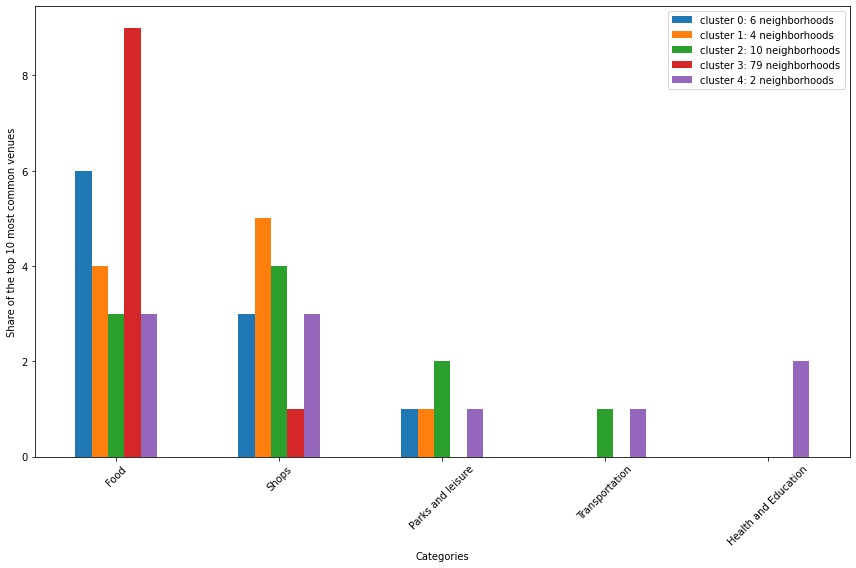

In [69]:
# Generate a bar chart
%matplotlib inline
import matplotlib.pyplot as plt
#plt.figure();
categories.plot(x='labels', 
                y=['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4'], 
                kind='bar', figsize = (12,8));
plt.xticks(rotation=45);
plt.xlabel('Categories')
plt.ylabel('Share of the top 10 most common venues')
plt.legend(['cluster 0: 6 neighborhoods', 'cluster 1: 4 neighborhoods', 
            'cluster 2: 10 neighborhoods', 'cluster 3: 79 neighborhoods', 
            'cluster 4: 2 neighborhoods']);
plt.tight_layout();

A few insights on how the neighborhoods might have been clustered:
- Cluster 0 consists primarily of eating and shopping venues
- Cluster 1 is similar to cluster 0, but with slightly more shops than eating places
- Cluster 3 is almost completely dominated by eating places. Notice that this is by far the most abundant cluster, which may indicate that eating venues are dominant in Toronto
- Cluster 4 seems to include places with food and shopping options but also with good leisure and connectivity options
- Cluster 5 is the category that features healthcare facilities and education venues. It is otherwise similar to cluster 4